Found 199 data files to analyze.


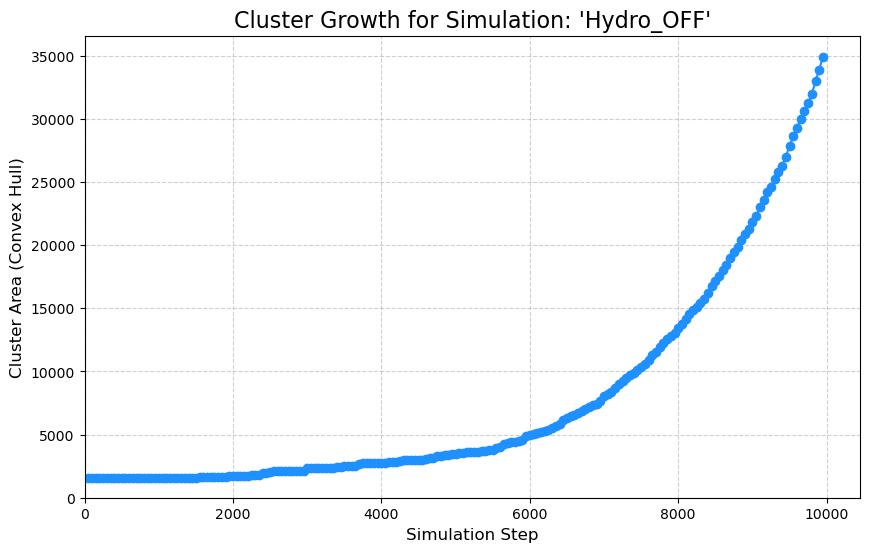

Saved cluster growth analysis plot to simulation_data_Hydro_OFF/Hydro_OFF_cluster_growth.png
Found 199 data files to analyze.


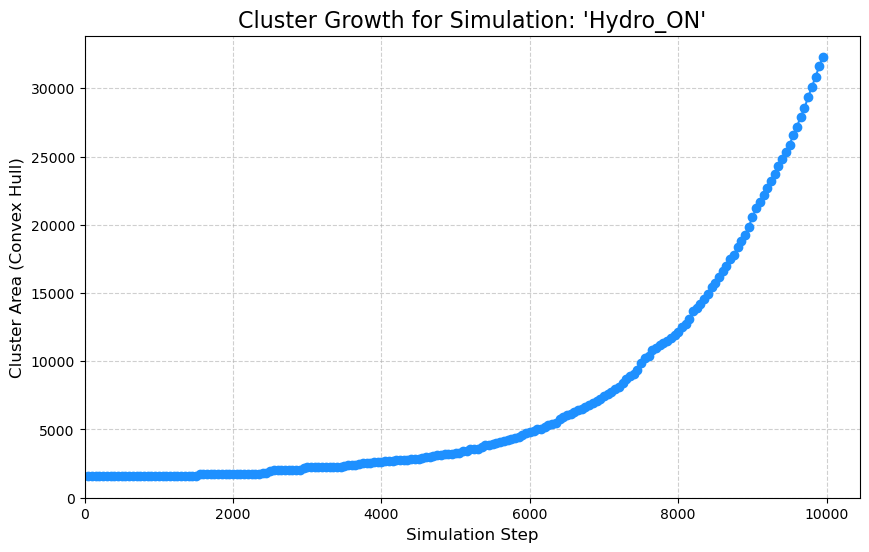

Saved cluster growth analysis plot to simulation_data_Hydro_ON/Hydro_ON_cluster_growth.png


In [152]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.spatial import ConvexHull

def load_cell_positions(filepath):
    """Loads only the cell positions from a given NPZ file."""
    try:
        with np.load(filepath, allow_pickle=True) as data:
            if 'cell_positions' in data and 'step' in data:
                return data['step'], data['cell_positions']
            else:
                print(f"Warning: 'cell_positions' or 'step' not found in {filepath}")
                return None, None
    except Exception as e:
        print(f"Error loading data from {filepath}: {e}")
        return None, None

def calculate_cluster_area(positions):
    """
    Calculates the area of the convex hull of the cell positions.
    Returns 0 if there are not enough points to form a hull.
    """
    if positions is None or len(positions) < 3:
        return 0.0
    try:
        hull = ConvexHull(positions)
        return hull.volume # In 2D, 'volume' gives the area of the convex hull
    except Exception as e:
        # This can happen if all points are collinear
        print(f"Could not compute convex hull: {e}")
        return 0.0

def analyze_cluster_growth(output_dir, simulation_name):
    """
    Analyzes all data files in a directory to measure and plot cluster growth.
    """
    # Find all data files for the simulation
    search_pattern = os.path.join(output_dir, f"{simulation_name}_data_*.npz")
    file_paths = sorted(glob.glob(search_pattern))

    if not file_paths:
        print(f"No data files found for simulation '{simulation_name}' in directory '{output_dir}'")
        return

    print(f"Found {len(file_paths)} data files to analyze.")

    # --- Process each data file ---
    steps = []
    areas = []
    for path in file_paths:
        step, positions = load_cell_positions(path)
        if step is not None:
            area = calculate_cluster_area(positions)
            steps.append(step)
            areas.append(area)
    
    if not steps:
        print("No valid data could be processed.")
        return

    # --- Plot the results ---
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(steps, areas, marker='o', linestyle='-', color='dodgerblue')
    
    # --- Style the plot for clarity ---
    ax.set_title(f"Cluster Growth for Simulation: '{simulation_name}'", fontsize=16)
    ax.set_xlabel("Simulation Step", fontsize=12)
    ax.set_ylabel("Cluster Area (Convex Hull)", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    
    # Save the plot
    output_filename = os.path.join(output_dir, f"{simulation_name}_cluster_growth.png")
    plt.savefig(output_filename)
    plt.show()
    
    print(f"Saved cluster growth analysis plot to {output_filename}")
    
    # return the data for further analysis if needed
    return steps, areas


if __name__ == '__main__':
    # --- USER CONFIGURATION ---
    # Specify which simulation run you want to analyze
    simulation_name = 'Hydro_OFF'  # Options: 'Hydro_ON', 'Hydro_OFF', 'main', 'A2'
    # ----------------------------------------

    output_dir = f"simulation_data_{simulation_name}"
    
    steps_off, areas_off = analyze_cluster_growth(output_dir, simulation_name)
    
        # --- USER CONFIGURATION ---
    # Specify which simulation run you want to analyze
    simulation_name = 'Hydro_ON'  # Options: 'Hydro_ON', 'Hydro_OFF', 'main', 'A2'
    # ----------------------------------------

    output_dir = f"simulation_data_{simulation_name}"
    
    steps_on, areas_on = analyze_cluster_growth(output_dir, simulation_name)
    
    


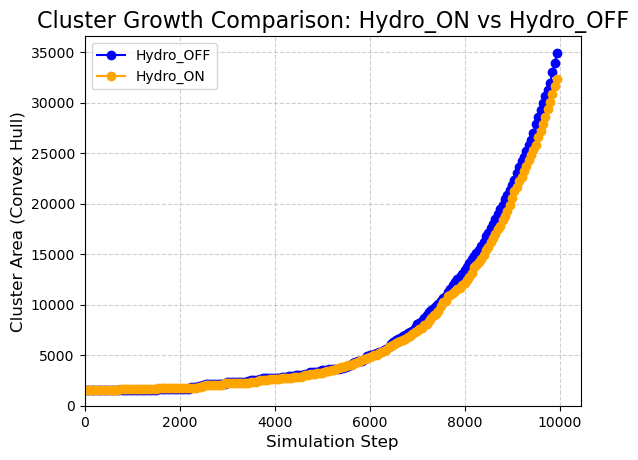

In [153]:
# plot comparison between Hydro_ON and Hydro_OFF
plt.plot(steps_off, areas_off, marker='o', linestyle='-', color='blue', label='Hydro_OFF')
plt.plot(steps_on, areas_on, marker='o', linestyle='-', color='orange', label='Hydro_ON')
plt.title("Cluster Growth Comparison: Hydro_ON vs Hydro_OFF", fontsize=16)
plt.xlabel("Simulation Step", fontsize=12)
plt.ylabel("Cluster Area (Convex Hull)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()